# Part two: Digit Recognizer with Deep Learning models in Tensorflow

The Digit Recognizer challenge on Kaggle is a computer vision challenge where the goal is to classify images of hand written digits correctly.

While working through this computer vision project, I will follow a slightly adjusted Machine Learning project check list from Aurelien Geron's book "Hands-On Machine Learning with Scikit_Learn, Keras & TensorFlow". (Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 35). O'Reilly Media. Kindle Edition.)

1.	Look at the big picture
2.	Get the data
3.	Discover and visualize the data to gain insights
4.	Prepare the data for Machine Learning algorithms
5.	Select, train and fine-tune models
6.	Conclusion

As with all coding posts, the full jupyter notebook can be found in my github repo below:

<https://github.com/John-Land/Projects/tree/main/Kaggle>

In this second attempt we will use Deep Learning in the tensorflow framework to tackle the Digit Recognizer challenge. We will train one fully connected Neural Network and one Convolution Neural Network to try and improve our results from tradition ML methods in part one.

Part one can be found under below links.

Project page: <https://john-land.github.io/Digit-Recognizer-ML-competition-Kaggle>

Github: <https://github.com/John-Land/Digit-Recognizer-ML-competition-Kaggle>

## 1. Look at the big picture

Before looking deeper into the dataset, it will first be helpful to understand how image features are represented as numbers. The Kaggle page has a good expiation in the data tab.

The MNIST dataset we will be working on consist of 28 x 28 pixel grey-scale images (black and white images). Therefore one image consists of 28 x 28 = 784 pixels. Each pixel is considered a unique feature of an image, therefore each image in our dataset has 784 features. The values of each pixel range from 0 to 255 inclusive, with higher values indicating darker coloured pixels.

Note that due to the fact that these images are grey-scale images, we have 28 x 28 x 1 = 784 pixels per image. If these were coloured RGB images, one image would have three difference values for each pixel (red, green and blue pixel intensity values), and the features space per image would be 28 X 28 X 3 pixels.

## 2. Get the data

The data is provided on the Kaggle challenge page. <https://www.kaggle.com/c/digit-recognizer/data>

We will first import the data and check for any missing values and some basic information.

In [1]:
# linear algebra
import numpy as np     

# data processing
import pandas as pd    

#data visualization
import matplotlib.pyplot as plt 

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

training_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.1. Data Structure

In [3]:
training_data.shape, testing_data.shape

((42000, 785), (28000, 784))

Training data: 42000 rows and 785 columns -> Data on 42000 images, 784 pixel values and 1 label per image.

Testing data: 28000 rows and 784 columns -> Data on 28000 images, 784 pixel values and no labels per image.

Our predictions for the labels in the test set will be submitted to Kaggle later.

In [4]:
print("Training Data missing values:"), training_data.isna().sum()

Training Data missing values:


(None,
 label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64)

In [5]:
print("Testing Data missing values:"), testing_data.isna().sum()

Testing Data missing values:


(None,
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 784, dtype: int64)

There are no missing values in the training and test set.

## 3. Discover and visualize the data to gain insights

The MNIST dataset we will be working on consist of 28 x 28 pixel grey-scale images (black and white images). 
Each row in our data set consists of all 784 pixels of one image and the label of the image.

In [6]:
training_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The below code visualizes one individual image by first reshaping the row in the data table for the individual image back into it's original 28x28x1 pixel matrix, and then visualizing the pixel matrix for the image with matplotlib.

original image is a: 0


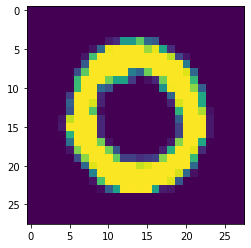

In [7]:
photo_id = 1
image_28_28 = np.array(training_data.iloc[photo_id, 1:]).reshape(28, 28)
plt.imshow(image_28_28)
print("original image is a:", training_data.iloc[photo_id, 0])

original image is a: 7


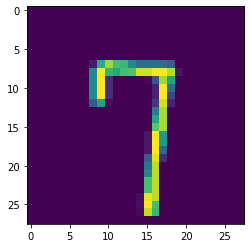

In [8]:
photo_id = 50
image_28_28 = np.array(training_data.iloc[photo_id, 1:]).reshape(28, 28)
plt.imshow(image_28_28)
print("original image is a:", training_data.iloc[photo_id, 0])

In [9]:
X_train = training_data.iloc[:, 1:]
Y_train = training_data[['label']]
X_test = testing_data
X_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_train.head(3)

,label
0,1
1,0
2,1


## 4. Prepare the data for Machine Learning algorithms

Before training our Neural Networks, we will use the MinMaxScaler to bring the pixel values between 0 and 1. 
Unlike with traditional ML methods, we will not use PCA to reduce the feature space.

In [11]:
X_train = training_data.iloc[:, 1:]
Y_train = training_data[['label']]
X_test = testing_data

from sklearn.preprocessing import MinMaxScaler

#fit standard scaler to training set
scaler = MinMaxScaler().fit(X_train)

#transform training set
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

#transform test set
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## 5. Select, train and fine-tune models

Now it's finally time to train our machine learning models. 

We will train two deep Neural Networks in tensorfow.
1.	Fully connected Neural Network
2.	Convolutional Neural Network.

During training, we will set 20% of the data aside, to track the validation loss and accuracy after each epoch.


### 5.1 Fully Connected Neural Network

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
model1 = keras.models.Sequential() 
model1.add(keras.layers.InputLayer(input_shape = X_train.shape[1:])) 
model1.add(keras.layers.Dense(300, activation = "relu")) 
model1.add(keras.layers.Dense(100, activation = "relu")) 
model1.add( keras.layers.Dense(10, activation = "softmax")) 

In [14]:
model1.compile(loss ="sparse_categorical_crossentropy", 
              optimizer ="sgd", 
              metrics =["accuracy"])

In [15]:
import time
start = time.process_time()
history1 = model1.fit(X_train, Y_train, epochs = 50, validation_split = 0.2)
end = time.process_time()
print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 5s 151us/sample - loss: 0.7493 - accuracy: 0.8118 - val_loss: 0.3710 - val_accuracy: 0.9011
Epoch 2/50
33600/33600 [==============================] - 4s 127us/sample - loss: 0.3326 - accuracy: 0.9058 - val_loss: 0.2877 - val_accuracy: 0.9193
Epoch 3/50
33600/33600 [==============================] - 4s 129us/sample - loss: 0.2754 - accuracy: 0.9206 - val_loss: 0.2527 - val_accuracy: 0.9313
Epoch 4/50
33600/33600 [==============================] - 4s 130us/sample - loss: 0.2412 - accuracy: 0.9304 - val_loss: 0.2285 - val_accuracy: 0.9350
Epoch 5/50
33600/33600 [==============================] - 4s 130us/sample - loss: 0.2165 - accuracy: 0.9385 - val_loss: 0.2047 - val_accuracy: 0.9414
Epoch 6/50
33600/33600 [==============================] - 4s 128us/sample - loss: 0.1952 - accuracy: 0.9454 - val_loss: 0.1898 - val_accuracy: 0.9444
Epoch 7/50
33600/33600 [===========================

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

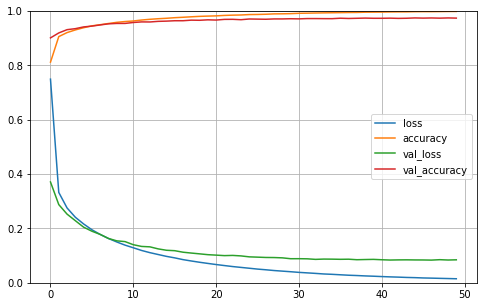

In [17]:
pd.DataFrame(history1.history).plot(figsize =( 8, 5))
plt.grid(True) 
plt.gca().set_ylim( 0, 1) # set the vertical range to [0-1] plt.show()
plt.show()

### 5.2 Convolutional Neural Network

In [18]:
X_train= np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [20]:
model2 = keras.models.Sequential([ 
    keras.layers.Conv2D(64, 7, activation ="relu", padding ="same", input_shape = X_train.shape[1:]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation ="relu", padding ="same"), 
    keras.layers.Conv2D(128, 3, activation ="relu", padding ="same"), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(256, 3, activation ="relu", padding ="same"), 
    keras.layers.Conv2D(256, 3, activation ="relu", padding ="same"), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation ="relu"), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation ="relu"),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation ="softmax") 
])

In [21]:
model2.compile(loss ="sparse_categorical_crossentropy", 
              optimizer ="sgd", 
              metrics =["accuracy"])

In [22]:
start = time.process_time()
history2 = model2.fit(X_train, Y_train, epochs = 5, validation_split = 0.2)
end = time.process_time()
print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 471s 14ms/sample - loss: 1.7645 - accuracy: 0.3834 - val_loss: 0.4661 - val_accuracy: 0.8788
Epoch 2/5
33600/33600 [==============================] - 501s 15ms/sample - loss: 0.5370 - accuracy: 0.8318 - val_loss: 0.1349 - val_accuracy: 0.9589
Epoch 3/5
33600/33600 [==============================] - 494s 15ms/sample - loss: 0.2902 - accuracy: 0.9160 - val_loss: 0.0958 - val_accuracy: 0.9721
Epoch 4/5
33600/33600 [==============================] - 492s 15ms/sample - loss: 0.2111 - accuracy: 0.9429 - val_loss: 0.0790 - val_accuracy: 0.9786
Epoch 5/5
33600/33600 [==============================] - 498s 15ms/sample - loss: 0.1713 - accuracy: 0.9538 - val_loss: 0.0737 - val_accuracy: 0.9782
training time in seconds: 8351.39
training time in minutes: 139.19


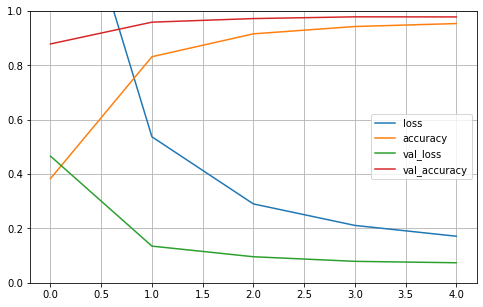

In [23]:
import matplotlib.pyplot as plt
pd.DataFrame(history2.history).plot(figsize =( 8, 5))
plt.grid(True) 
plt.gca().set_ylim( 0, 1) # set the vertical range to [0-1] plt.show()
plt.show()

In [24]:
start = time.process_time()
history2 = model2.fit(X_train, Y_train, epochs = 5, validation_split = 0.2)
end = time.process_time()
print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 491s 15ms/sample - loss: 0.1415 - accuracy: 0.9618 - val_loss: 0.0650 - val_accuracy: 0.9813
Epoch 2/5
33600/33600 [==============================] - 682s 20ms/sample - loss: 0.1242 - accuracy: 0.9679 - val_loss: 0.0669 - val_accuracy: 0.9801
Epoch 3/5
33600/33600 [==============================] - 503s 15ms/sample - loss: 0.1087 - accuracy: 0.9714 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 4/5
33600/33600 [==============================] - 501s 15ms/sample - loss: 0.0942 - accuracy: 0.9750 - val_loss: 0.0474 - val_accuracy: 0.9863
Epoch 5/5
33600/33600 [==============================] - 498s 15ms/sample - loss: 0.0825 - accuracy: 0.9783 - val_loss: 0.0434 - val_accuracy: 0.9880
training time in seconds: 8861.73
training time in minutes: 147.7


In [25]:
start = time.process_time()
history2 = model2.fit(X_train, Y_train, epochs = 5, validation_split = 0.2)
end = time.process_time()
print('training time in seconds:', np.round(end - start,2))
print('training time in minutes:', np.round((end - start)/60, 2))

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 499s 15ms/sample - loss: 0.0819 - accuracy: 0.9791 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 2/5
33600/33600 [==============================] - 508s 15ms/sample - loss: 0.0681 - accuracy: 0.9818 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 3/5
33600/33600 [==============================] - 492s 15ms/sample - loss: 0.0628 - accuracy: 0.9828 - val_loss: 0.0591 - val_accuracy: 0.9856
Epoch 4/5
33600/33600 [==============================] - 508s 15ms/sample - loss: 0.0579 - accuracy: 0.9848 - val_loss: 0.0435 - val_accuracy: 0.9890
Epoch 5/5
33600/33600 [==============================] - 505s 15ms/sample - loss: 0.0556 - accuracy: 0.9862 - val_loss: 0.0506 - val_accuracy: 0.9871
training time in seconds: 8771.91
training time in minutes: 146.2


### 6. Conclusion

Both models performed better than our first attempt with tradition ML methods.
The fully connected Neural Network reaches a validation accuracy of 97.4%.
The Convolutional Neural Network performs even better, with a validation accuracy of 98.7%.

This is better than our best traditional ML methods, which reached an accuracy of 94%.

Based on the best validation set accuracy score, we will submit our predictions with the Convolutional Neural Network.

In [26]:
predictions = model2.predict_classes(X_test)
ImageId = np.array(range(1, X_test.shape[0]+1, 1))

output = pd.DataFrame({'ImageId': ImageId, 'Label': predictions})
output.to_csv('my_submission_deep_learning.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
